In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('/home/anatol/Downloads/AiBD_zadania-master/TidyData/Analysis_data/TIER_Tidy.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33615 entries, 0 to 33614
Data columns (total 5 columns):
country    33419 non-null object
year       33615 non-null int64
cases      33615 non-null int64
sex        33615 non-null object
age        33615 non-null object
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


In [3]:
df.head()

country  year  cases sex    age
0      AD  1996      0   m  0--14
1      AD  1997      0   m  0--14
2      AD  1998      0   m  0--14
3      AD  1999      0   m  0--14
4      AD  2000      0   m  0--14

In [4]:
df.describe()

year         cases
count  33615.000000  33615.000000
mean    2001.703198    647.021300
std        4.293266   3377.082536
min     1980.000000      0.000000
25%     1998.000000      6.000000
50%     2002.000000     45.000000
75%     2005.000000    273.500000
max     2008.000000  90498.000000

In [5]:
df.mean()

year     2001.703198
cases     647.021300
dtype: float64

In [6]:
sums = df.groupby('sex')['cases'].agg('sum')

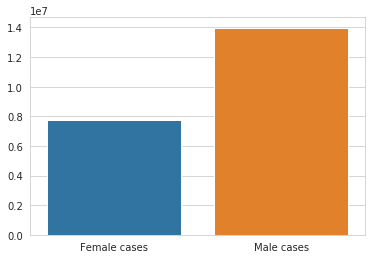

In [7]:
sns.barplot(x=['Female cases', 'Male cases'], y=sums.values)

# Wykres z potwierdzeniem tego, ze meszczyzni czesciej choruja na gruzlice

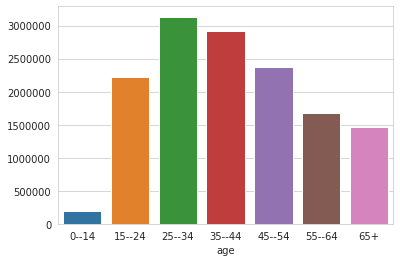

In [8]:
ages_sums = df[df['sex']=='m'].groupby('age')['cases'].agg('sum')
sns.barplot(x=ages_sums.index, y=ages_sums.values)

# Najbardziej narażona grupa wiekowa to ludzie w przedziale 25-34 lata.

In [9]:
tb_df = pd.read_csv("/home/anatol/Downloads/AiBD_zadania-master/TidyData/Original_data/tb.csv")

tb_df = tb_df.rename(columns={'iso2':'country'})
tb_df = tb_df.rename(columns=lambda x: re.sub('new_sp_','',x))
tb_df = tb_df.drop(['new_sp', 'mu', 'fu', 'm04', 'f04', 'm514', 'f04', 'f514'], axis=1)
tb_df = pd.melt(tb_df, id_vars=['country', 'year'], var_name='column', value_name='cases')
tb_df['sex'] = tb_df["column"].str[0]
sex_sum2 = tb_df.groupby('sex')['cases'].agg('sum')


In [10]:
country = tb_df.groupby('country')['cases'].agg('sum')
sorted_country = country.sort_values()
print('Panstwa z najwieksza liczba przypadkow gruzlicy')
print(sorted_country[-10::])

Panstwa z najwieksza liczba przypadkow gruzlicy
country
KE     429413.0
BR     438554.0
PH     490040.0
CD     603095.0
VN     709695.0
BD     758008.0
ZA     889364.0
ID    1125360.0
IN    3966169.0
CN    4065174.0
Name: cases, dtype: float64


In [11]:
print('Panstwa z najmniejsza liczba przypadkow gruzlicy')
print(sorted_country[:10])

Panstwa z najmniejsza liczba przypadkow gruzlicy
country
AI     1.0
SM     2.0
NU     2.0
MC     2.0
BM     2.0
MS     4.0
VG     4.0
VI     7.0
KY    12.0
TC    15.0
Name: cases, dtype: float64


In [12]:
country.describe()

count    2.120000e+02
mean     1.023162e+05
std      4.108895e+05
min      1.000000e+00
25%      1.093500e+03
50%      1.061850e+04
75%      5.467850e+04
max      4.065174e+06
Name: cases, dtype: float64

In [17]:
country['BY'] 

7389.0

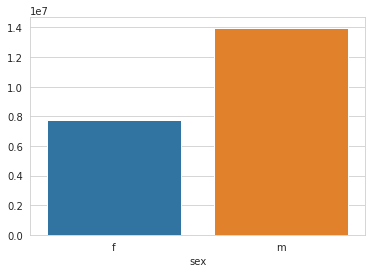

In [15]:
sns.barplot(x=sex_sum2.index, y=sex_sum2.values)

In [18]:
sum(sex_sum2.values)

21749621.0